In [0]:
%pip install tzwhere
%pip install geopandas
%pip install pyspark_dist_explore

Python interpreter will be restarted.
  Created wheel for tzwhere: filename=tzwhere-3.0.3-py3-none-any.whl size=23742600 sha256=27611085271a992eb8cf74ec0b9738a86ecc1994d0ca15f4fed4ce34ba5397f3
  Stored in directory: /home/spark-988e1f66-a4d1-4e75-921f-3b/.cache/pip/wheels/1c/5b/38/2c0772ba05aa51fefb242a15ed85fb649990712901b6c80458
Successfully built tzwhere
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from pyspark.sql.functions import *
from pyspark.sql import *
from pyspark.sql.types import IntegerType, StringType
from pyspark.ml.regression import (
    LinearRegression,
    RandomForestRegressor,
    DecisionTreeRegressor,
    GBTRegressor,
)
from pyspark.ml.classification import (
    DecisionTreeClassifier,
    RandomForestClassifier,
    GBTClassifier,
    LogisticRegression,
    MultilayerPerceptronClassifier,
)
from pyspark.ml.feature import (
    VectorAssembler,
    StandardScaler,
    MinMaxScaler,
    StringIndexer,
    OneHotEncoder,
)
from pyspark.ml.stat import Correlation
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import (
    RegressionEvaluator,
    MulticlassClassificationEvaluator,
    BinaryClassificationEvaluator,
)
from pyspark.ml import Pipeline
from sklearn.metrics import roc_curve, auc
import numpy as np
import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import re
import pytz

# from tzwhere import tzwhere
# import geopandas as gpd
# import pyspark_dist_explore as psgraph
BACKGROUND = "black"
FOREGROUND = "#73F9CB"

In [0]:
blob_container = "###"  # The name of your container created in https://portal.azure.com
storage_account = (
    "###"  # The name of your Storage account created in https://portal.azure.com
)
secret_scope = "###"  # The name of the scope created in your local computer using the Databricks CLI
secret_key = "###"  # saskey The name of the secret key created in your local computer using the Databricks CLI
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

spark.conf.set(
    f"fs.azure.sas.{blob_container}.{storage_account}.blob.core.windows.net",
    dbutils.secrets.get(scope=secret_scope, key=secret_key),
)

In [0]:
data = spark.read.parquet(f"{blob_url}/final_data_phase4_3b_Dec")

In [0]:
display(data)

_utc_dept_ts,_utc_dept_minus2_ts,_utc_dept_actual_ts,_utc_arr_ts,_utc_arr_actual_ts,_dep_time_str,_local_dept_ts,_local_dept_minus2_ts,_local_dept_actual_ts,_local_at_src_airport_arr_ts,_local_at_src_airport_arr_actual_ts,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,origin_airport_iata,origin_airport_tz,origin_airport_type,origin_airport_elevation,origin_airport_iso_country,origin_airport_iso_region,origin_airport_ws_station_id,dest_airport_iata,dest_airport_tz,dest_airport_type,dest_airport_elevation,dest_airport_iso_country,dest_airport_iso_region,dest_airport_ws_station_id,origin_weather_Station,origin_weather_Datehour,origin_weather_Avg_Elevation,origin_weather_Avg_HourlyAltimeterSetting,origin_weather_Avg_HourlyDewPointTemperature,origin_weather_Avg_HourlyDryBulbTemperature,origin_weather_Avg_HourlyRelativeHumidity,origin_weather_Avg_HourlySeaLevelPressure,origin_weather_Avg_HourlyStationPressure,origin_weather_Avg_HourlyVisibility,origin_weather_Avg_HourlyWetBulbTemperature,origin_weather_Avg_HourlyWindSpeed,origin_weather_Avg_Precip_Double,origin_weather_Trace_Rain,origin_weather_NonZero_Rain,origin_weather_HourlyPressureTendency_Increasing,origin_weather_HourlyPressureTendency_Decreasing,origin_weather_HourlyPressureTendency_Constant,origin_weather_Calm_Winds,origin_weather_Sky_Conditions_CLR,origin_weather_Sky_Conditions_FEW,origin_weather_Sky_Conditions_SCT,origin_weather_Sky_Conditions_BKN,origin_weather_Sky_Conditions_OVC,origin_weather_Sky_Conditions_VV,origin_weather_Present_Weather_Drizzle,origin_weather_Present_Weather_Rain,origin_weather_Present_Weather_Snow,origin_weather_Present_Weather_SnowGrains,origin_weather_Present_Weather_IceCrystals,origin_weather_Present_Weather_Hail,origin_weather_Present_Weather_Mist,origin_weather_Present_Weather_Fog,origin_weather_Present_Weather_Smoke,origin_weather_Present_Weather_Dust,origin_weather_Present_Weather_Haze,origin_weather_Present_Weather_Storm,dest_weather_Station,dest_weather_Datehour,dest_weather_Avg_Elevation,dest_weather_Avg_HourlyAltimeterSetting,dest_weather_Avg_HourlyDewPointTemperature,dest_weather_Avg_HourlyDryBulbTemperature,dest_weather_Avg_HourlyRelativeHumidity,dest_weather_Avg_HourlySeaLevelPressure,dest_weather_Avg_HourlyStationPressure,dest_weather_Avg_HourlyVisibility,dest_weather_Avg_HourlyWetBulbTemperature,dest_weather_Avg_HourlyWindDirection,dest_weather_Avg_HourlyWindSpeed,dest_weather_Avg_Precip_Double,dest_weather_Trace_Rain,dest_weather_NonZero_Rain,dest_weather_HourlyPressureTendency_Increasing,dest_weather_HourlyPressureTendency_Decreasing,dest_weather_HourlyPressureTendency_Constant,dest_weather_Calm_Winds,dest_weather_Sky_Conditions_CLR,dest_weather_Sky_Conditions_FEW,dest_weather_Sky_Conditions_SCT,dest_weather_Sky_Conditions_BKN,dest_weather_Sky_Conditions_OVC,dest_weather_Sky_Conditions_VV,dest_weather_Present_Weather_Drizzle,dest_weather_Present_Weather_Rain,dest_weather_Present_Weather_Snow,dest_weather_Present_Weather_SnowGrains,dest_weather_Present_Weather_IceCrystals,dest_weather_Present_Weather_Hail,dest_weather_Present_Weather_Mist,dest_weather_Present_Weather_Fog,dest_weather_Present_Weather_Smoke,dest_weather_Present_Weather_Dust,dest_weather_Present_Weather_Haze,dest_weather_Present_Weather_Storm,YEAR,origin_page_rank,dest_page_rank,days_to_next_holiday,origin_traffic,traf

In [0]:
data.columns

Out[67]: ['_utc_dept_ts',
 '_utc_dept_minus2_ts',
 '_utc_dept_actual_ts',
 '_utc_arr_ts',
 '_utc_arr_actual_ts',
 '_dep_time_str',
 '_local_dept_ts',
 '_local_dept_minus2_ts',
 '_local_dept_actual_ts',
 '_local_at_src_airport_arr_ts',
 '_local_at_src_airport_arr_actual_ts',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',

In [0]:
# drop timestamp and string features
data = data.drop(
    "_utc_dept_ts",
    "_utc_dept_minus2_ts",
    "_utc_dept_actual_ts",
    "_utc_arr_ts",
    "_utc_arr_actual_ts",
    "_dep_time_str",
    "_local_dept_ts",
    "_local_dept_minus2_ts",
    "_local_dept_actual_ts",
    "_local_at_src_airport_arr_ts",
    "_local_at_src_airport_arr_actual_ts",
    "OP_UNIQUE_CARRIER",
    "OP_CARRIER",
    "ORIGIN_CITY_NAME",
    "ORIGIN_STATE_ABR",
    "ORIGIN_STATE_NM",
    "DEST_CITY_NAME",
    "DEST_STATE_ABR",
    "DEST_STATE_NM",
    "DEP_TIME_BLK",
    "ARR_TIME_BLK",
    "origin_airport_iata",
    "origin_airport_tz",
    "origin_airport_type",
    "origin_airport_elevation",
    "origin_airport_iso_country",
    "origin_airport_iso_region",
    "origin_airport_ws_station_id",
    "dest_airport_iata",
    "dest_airport_tz",
    "dest_airport_type",
    "dest_airport_elevation",
    "dest_airport_iso_country",
    "dest_airport_iso_region",
    "dest_airport_ws_station_id",
    "origin_weather_Station",
    "origin_weather_Datehour",
    "dest_weather_Station",
    "dest_weather_Datehour",
    "DELAY_LABEL",
    "origin_traffic",
    "traffic_date",
    "TAIL_NUM",
    "DEST",
    "FL_DATE",
    "ORIGIN",
    "CANCELLATION_CODE",
)

# drop non-physical features and some with very low correlation which we won't be using in our model so that our correlation matrix doesn't look untidy.
data = data.drop(
    "DAY_OF_MONTH",
    "OP_CARRIER_AIRLINE_ID",
    "OP_CARRIER_FL_NUM",
    "ORIGIN_AIRPORT_ID",
    "ORIGIN_AIRPORT_SEQ_ID",
    "ORIGIN_CITY_MARKET_ID",
    "ORIGIN_STATE_FIPS",
    "ORIGIN_WAC",
    "_utc_dept_ts",
    "_utc_dept_minus2_ts",
    "_utc_dept_actual_ts",
    "_utc_dept_ts",
    "_utc_dept_minus2_ts",
    "_utc_dept_actual_ts",
    "_utc_arr_ts",
    "_utc_arr_actual_ts",
    "_dep_time_str",
    "_local_dept_ts",
    "_local_dept_minus2_ts",
    "_local_dept_actual_ts",
    "_local_at_src_airport_arr_ts",
    "_utc_dept_ts",
    "_utc_dept_minus2_ts",
    "_local_dept_actual_ts",
    "_local_at_src_airport_arr_ts",
    "DEST_AIRPORT_ID",
    "DEST_AIRPORT_SEQ_ID",
    "DEST_CITY_MARKET_ID",
    "DEST_STATE_FIPS",
    "DEST_WAC",
    "CRS_DEP_TIME",
    "DEP_TIME",
    "DEP_DELAY",
    "DEP_DELAY_GROUP",
    "TAXI_IN",
    "TAXI_OUT",
    "CRS_ARR_TIME",
    "WHEELS_OFF",
    "WHEELS_ON",
    "TAXI_IN" "CRS_ARR_TIME",
    "ARR_TIME",
    "ARR_DELAY",
    "ARR_DELAY_NEW",
    "ARR_DEL15",
    "ARR_DELAY_GROUP",
    "CANCELLED",
    "DIVERTED",
    "CRS_ELAPSED_TIME",
    "ACTUAL_ELAPSED_TIME",
    "AIR_TIME",
    "DISTANCE_GROUP",
    "traffic",
    "dest_weather_HourlyPressureTendency_Constant",
    "dest_weather_HourlyPressureTendency_Decreasing",
    "origin_weather_Present_Weather_SnowGrains",
)


data = data.drop(
    "origin_weather_HourlyPressureTendency_Constant",
    "origin_weather_HourlyPressureTendency_Decreasing",
    "FLIGHTS",
    "origin_weather_Present_Weather_Hail",
    "dest_weather_Avg_HourlyWetBulbTemperature",
    "dest_weather_Sky_Conditions_SCT",
    "dest_weather_Present_Weather_Hail",
    "dest_weather_Present_Weather_Drizzle",
    "origin_weather_Present_Weather_Drizzle",
    "origin_weather_Sky_Conditions_FEW",
    "dest_weather_Present_Weather_SnowGrains",
    "dest_weather_HourlyPressureTendency_Increasing",
    "origin_weather_Calm_Winds",
    "dest_weather_Present_Weather_IceCrystals",
    "origin_weather_Present_Weather_IceCrystals",
    "dest_weather_Calm_Winds",
    "origin_weather_Present_Weather_Haze",
    "origin_weather_Present_Weather_Dust",
    "origin_weather_Present_Weather_Smoke",
    "dest_weather_Present_Weather_Haze",
    "dest_weather_Present_Weather_Dust,origin_weather_Avg_HourlyStationPressure",
    "dest_weather_Present_Weather_Smoke",
    "origin_weather_Avg_Elevation",
)

In [0]:
data.printSchema()

root
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- DEP_DEL15: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- origin_weather_Avg_HourlyAltimeterSetting: double (nullable = true)
 |-- origin_weather_Avg_HourlyDewPointTemperature: double (nullable = true)
 |-- origin_weather_Avg_HourlyDryBulbTemperature: double (nullable = true)
 |-- origin_weather_Avg_HourlyRelativeHumidity: double (nullable = true)
 |-- origin_weather_Avg_HourlySeaLevelPressure: double (nullable = true)
 |-- origin_weather_Avg_HourlyStationPressure: double (nullable = true)
 |-- origin_weather_Avg_HourlyVisibility: double (nullable = true)
 |-- origin_weather_Avg_HourlyWetBulbTemperature: double (nullable = true)
 |-- origin_weather_Avg_HourlyWindSpeed: double (nullable = true)
 |-- origin_weather_Avg_Precip_Double: double (nullable = true)
 |-- origin_weather_Trace_Rain: i

In [0]:
# Split the joined data frame into year chunks to allow concatenating them as blocks as shown visually in the image above.
# The custom-cross validator is expecting a dictionary where each key is a different fold, and the key value is a dataframe with a column called 'cv' that designates rows
# As either train or split
"""
series_folds = {'fold1': (['2015', '2016'], ['2017','2018']),
                      'fold2': (['2015', '2016','2017'], ['2018','2019']),
                      'fold3': (['2015', '2016','2017','2018'], ['2019','2020']),

                      }
cross_validation_data = {}
for fold in series_folds.keys():
  train_years = series_folds[fold][0]
  val_years = series_folds[fold][1]
  cross_validation_data[fold] = data.filter(data.YEAR.isin(train_years + val_years))\
                                    .withColumn('cv', when(col('YEAR').isin(train_years), 'train').otherwise('test')).cache()
"""

Out[23]: "\nseries_folds = {'fold1': (['2015', '2016'], ['2017','2018']),\n                      'fold2': (['2015', '2016','2017'], ['2018','2019']),\n                      'fold3': (['2015', '2016','2017','2018'], ['2019','2020']),\n\n                      }\ncross_validation_data = {}\nfor fold in series_folds.keys():\n  train_years = series_folds[fold][0]\n  val_years = series_folds[fold][1]\n  cross_validation_data[fold] = data.filter(data.YEAR.isin(train_years + val_years))                                    .withColumn('cv', when(col('YEAR').isin(train_years), 'train').otherwise('test')).cache()\n"

### Classification Models

When switching to a classification task we will adjust our loss function from MSE to the categorical cross-entropy which is defined by the following relationship: 

$$Cross Entropy = -\frac{1}{M}\sum_{i=1}^{M}{y_i\log{\hat{y_i}} + (1-y_i)log(1 - \hat{y_i})}$$

In addition to the cross-entropy loss metric which will be used for the actual model training process we will also evaluate the effectiveness of our models using the precision, recall, and F1 score metrics to understand how often our model is falsely predicting a flight will be delayed (false positive) perhaps resulting in customers missing their flights because they are late to the gate thinking they had extra time vs falsely predicting a flight will not be delayed when it is (false negative) resulting in the customer spending more time waiting at the gate then necessary. 

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN} $$

$$F1_{score} = \frac{2(Recall)(Precision)}{Recall + Precision}$$

### New features

In [0]:
feature_columns = [
    "delays_last_4hrs",
    "fraction_delayed_last_4hrs",
    "inbound_dep_delay_time",
    "volume_sigma",
    "origin_weather_Avg_HourlyRelativeHumidity",
    "dest_weather_Avg_HourlyRelativeHumidity",
    "origin_weather_NonZero_Rain",
    "dest_weather_NonZero_Rain",
    "origin_weather_Present_Weather_Rain",
    "origin_weather_Trace_Rain",
    "origin_weather_Sky_Conditions_OVC",
    "origin_weather_Present_Weather_Storm",
    "origin_weather_Present_Weather_Mist",
    "dest_weather_Present_Weather_Rain",
    "origin_weather_Avg_HourlyAltimeterSetting",
    "origin_weather_Avg_HourlySeaLevelPressure",
    "dest_weather_Avg_HourlyAltimeterSetting",
    "dest_weather_Avg_HourlySeaLevelPressure",
    "origin_weather_Avg_HourlyVisibility",
]

## Re Sampling

###DownSampling

As also discussed earlier, we needed to perform downsampling to the final joined flight and weather dataset prior to training the model due to the imbalanced data set. With downsampling, the majority class 'not-delayed' is reduced by the ratio between majority class and minority class 'delayed,' so that the data set is balanced for the target variable 'DEP_DEL15'. This reduces the bias when training the model.

Out[32]: [Text(0, 0, 'Not-Delayed'), Text(1, 0, 'Delayed')]

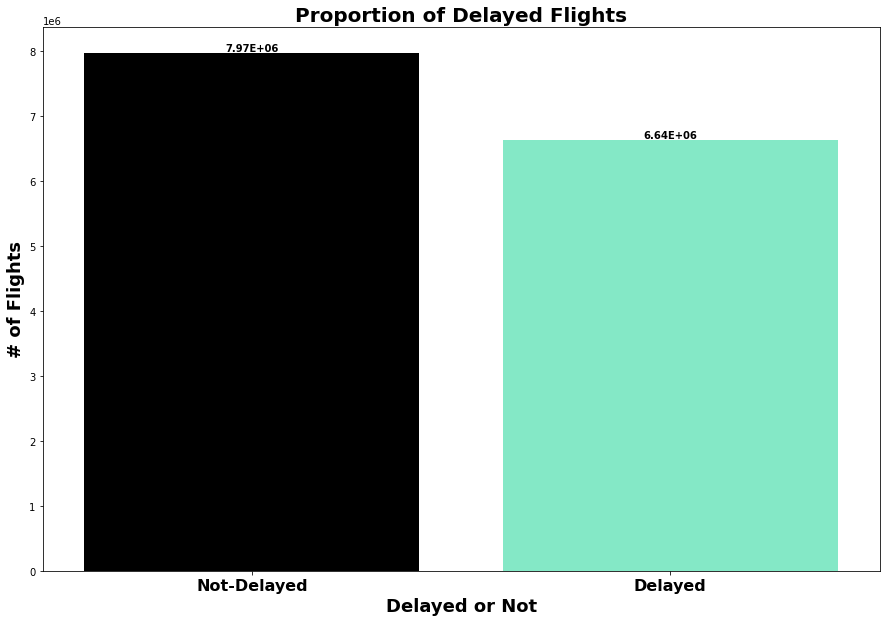

In [0]:
###DownSampling
# https://medium.com/@junwan01/oversampling-and-undersampling-with-pyspark-5dbc25cdf253

major_df = data.where("DEP_DEL15 == 0.0")
minor_df = data.where("DEP_DEL15 == 1.0")
ratio = int(major_df.count() / minor_df.count())
sampled_majority_df = major_df.sample(False, 1 / ratio)
data = sampled_majority_df.unionAll(minor_df)


data.createOrReplaceTempView("combined_df_2")
delay_count = spark.sql(
    "select DEP_DEL15 as delayed, count(DEP_DEL15) as counts from combined_df_2 group by dep_del15 "
).toPandas()
fig, ax = plt.subplots(figsize=(15, 10))
colors = {0.0: BACKGROUND, 1.0: FOREGROUND}
sns.barplot(data=delay_count, x="delayed", y="counts", palette=colors)
ax.bar_label(ax.containers[0], fmt="%.2E", fontweight="bold")
ax.set_title(
    "Proportion of Delayed Flights", fontdict={"fontsize": 20, "fontweight": "bold"}
)
ax.set_xlabel("Delayed or Not", fontdict={"fontsize": 18, "fontweight": "bold"})
ax.set_ylabel("# of Flights", fontdict={"fontsize": 18, "fontweight": "bold"})
ax.set_xticklabels(
    ["Not-Delayed", "Delayed"], fontdict={"fontsize": 16, "fontweight": "bold"}
)

In [0]:
data.write.parquet(f"{blob_url}/final_data_phase4_3b_Dec_undersample")

In [0]:
data_undersample = spark.read.parquet(
    f"{blob_url}/final_data_phase4_3b_Dec_undersample"
)

###OverSampling

Out[37]: [Text(0, 0, 'Not-Delayed'), Text(1, 0, 'Delayed')]

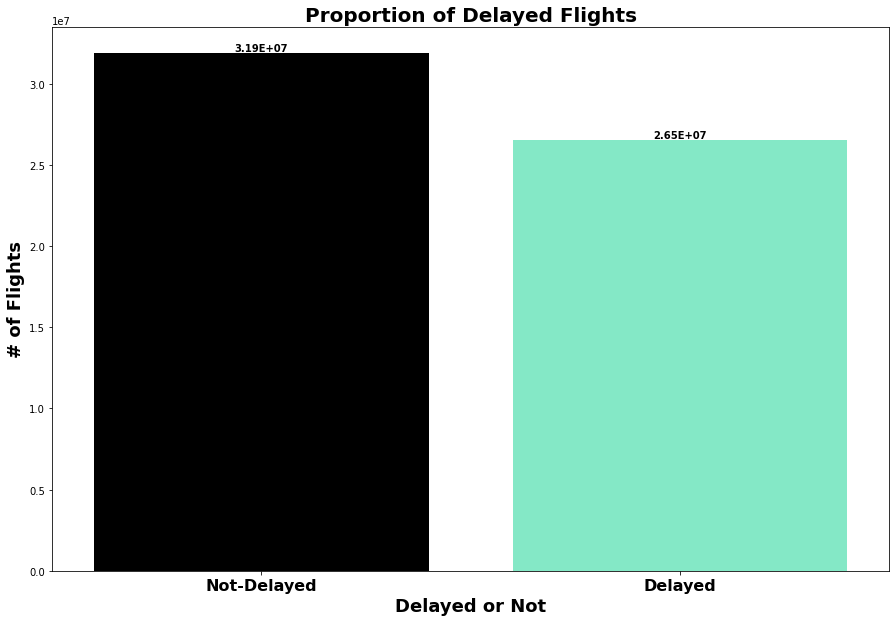

In [0]:
major_df = data.where("DEP_DEL15 == 0.0")
minor_df = data.where("DEP_DEL15 == 1.0")
ratio = int(major_df.count() / minor_df.count())
a = range(ratio)
# duplicate the minority rows
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop(
    "dummy"
)
# combine both oversampled minority rows and previous majority rows
data = major_df.unionAll(oversampled_df)

data.createOrReplaceTempView("combined_df_2")
delay_count = spark.sql(
    "select DEP_DEL15 as delayed, count(DEP_DEL15) as counts from combined_df_2 group by dep_del15 "
).toPandas()
fig, ax = plt.subplots(figsize=(15, 10))
colors = {0.0: BACKGROUND, 1.0: FOREGROUND}
sns.barplot(data=delay_count, x="delayed", y="counts", palette=colors)
ax.bar_label(ax.containers[0], fmt="%.2E", fontweight="bold")
ax.set_title(
    "Proportion of Delayed Flights", fontdict={"fontsize": 20, "fontweight": "bold"}
)
ax.set_xlabel("Delayed or Not", fontdict={"fontsize": 18, "fontweight": "bold"})
ax.set_ylabel("# of Flights", fontdict={"fontsize": 18, "fontweight": "bold"})
ax.set_xticklabels(
    ["Not-Delayed", "Delayed"], fontdict={"fontsize": 16, "fontweight": "bold"}
)

In [0]:
data.write.parquet(f"{blob_url}/final_data_phase4_3b_Dec_oversample")

In [0]:
data_oversample = spark.read.parquet(f"{blob_url}/final_data_phase4_3b_Dec_oversample")

###SMOTE

In [0]:
# SMOTE
# https://medium.com/@haoyunlai/smote-implementation-in-pyspark-76ec4ffa2f1d

import random
import numpy as np
from functools import reduce
import pyspark.sql.functions as F
from pyspark.sql import Row
from pyspark.sql.functions import (
    rand,
    col,
    when,
    concat,
    substring,
    lit,
    udf,
    lower,
    sum as ps_sum,
    count as ps_count,
    row_number,
)
from pyspark.sql.window import *
from pyspark.sql import DataFrame
from pyspark.ml.feature import (
    VectorAssembler,
    BucketedRandomProjectionLSH,
    VectorSlicer,
)
from pyspark.sql.window import Window
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import array, create_map, struct

############################## spark smote oversampling ##########################
# for categorical columns, must take its stringIndexed form (smote should be after string indexing, default by frequency)


def pre_smote_df_process(df, num_cols, cat_cols, target_col, index_suffix="_index"):
    """
    string indexer and vector assembler
    inputs:
    * df: spark df, original
    * num_cols: numerical cols to be assembled
    * cat_cols: categorical cols to be stringindexed
    * target_col: prediction target
    * index_suffix: will be the suffix after string indexing
    output:
    * vectorized: spark df, after stringindex and vector assemble, ready for smote
    """
    if df.select(target_col).distinct().count() != 2:
        raise ValueError("Target col must have exactly 2 classes")

    if target_col in num_cols:
        num_cols.remove(target_col)

    # only assembled numeric columns into features
    assembler = VectorAssembler(inputCols=num_cols, outputCol="features")
    # index the string cols, except possibly for the label col
    assemble_stages = [
        StringIndexer(inputCol=column, outputCol=column + index_suffix).fit(df)
        for column in list(set(cat_cols) - set([target_col]))
    ]
    # add the stage of numerical vector assembler
    assemble_stages.append(assembler)
    pipeline = Pipeline(stages=assemble_stages)
    pos_vectorized = pipeline.fit(df).transform(df)

    # drop original num cols and cat cols
    drop_cols = num_cols + cat_cols

    keep_cols = [a for a in pos_vectorized.columns if a not in drop_cols]

    vectorized = (
        pos_vectorized.select(*keep_cols)
        .withColumn("label", pos_vectorized[target_col])
        .drop(target_col)
    )

    return vectorized


def smote(vectorized_sdf, smote_config):
    """
    contains logic to perform smote oversampling, given a spark df with 2 classes
    inputs:
    * vectorized_sdf: cat cols are already stringindexed, num cols are assembled into 'features' vector
      df target col should be 'label'
    * smote_config: config obj containing smote parameters
    output:
    * oversampled_df: spark df after smote oversampling
    """
    dataInput_min = vectorized_sdf[vectorized_sdf["label"] == 1]
    dataInput_maj = vectorized_sdf[vectorized_sdf["label"] == 0]

    # LSH, bucketed random projection
    brp = BucketedRandomProjectionLSH(
        inputCol="features",
        outputCol="hashes",
        seed=smote_config.seed,
        bucketLength=smote_config.bucketLength,
    )
    # smote only applies on existing minority instances
    model = brp.fit(dataInput_min)
    model.transform(dataInput_min)

    # here distance is calculated from brp's param inputCol
    self_join_w_distance = model.approxSimilarityJoin(
        dataInput_min, dataInput_min, float("inf"), distCol="EuclideanDistance"
    )

    # remove self-comparison (distance 0)
    self_join_w_distance = self_join_w_distance.filter(
        self_join_w_distance.EuclideanDistance > 0
    )

    over_original_rows = Window.partitionBy("datasetA").orderBy("EuclideanDistance")

    self_similarity_df = self_join_w_distance.withColumn(
        "r_num", F.row_number().over(over_original_rows)
    )

    self_similarity_df_selected = self_similarity_df.filter(
        self_similarity_df.r_num <= smote_config.k
    )

    over_original_rows_no_order = Window.partitionBy("datasetA")

    # list to store batches of synthetic data
    res = []

    # two udf for vector add and subtract, subtraction include a random factor [0,1]
    subtract_vector_udf = F.udf(
        lambda arr: random.uniform(0, 1) * (arr[0] - arr[1]), VectorUDT()
    )
    add_vector_udf = F.udf(lambda arr: arr[0] + arr[1], VectorUDT())

    # retain original columns
    original_cols = dataInput_min.columns

    for i in range(smote_config.multiplier):
        print("generating batch %s of synthetic instances" % i)
        # logic to randomly select neighbour: pick the largest random number generated row as the neighbour
        df_random_sel = (
            self_similarity_df_selected.withColumn("rand", F.rand())
            .withColumn("max_rand", F.max("rand").over(over_original_rows_no_order))
            .where(F.col("rand") == F.col("max_rand"))
            .drop(*["max_rand", "rand", "r_num"])
        )
        # create synthetic feature numerical part
        df_vec_diff = df_random_sel.select(
            "*",
            subtract_vector_udf(
                F.array("datasetA.features", "datasetB.features")
            ).alias("vec_diff"),
        )
        df_vec_modified = df_vec_diff.select(
            "*",
            add_vector_udf(F.array("datasetA.features", "vec_diff")).alias("features"),
        )

        # for categorical cols, either pick original or the neighbour's cat values
        for c in original_cols:
            # randomly select neighbour or original data
            col_sub = random.choice(["datasetA", "datasetB"])
            val = "{0}.{1}".format(col_sub, c)
            if c != "features":
                # do not unpack original numerical features
                df_vec_modified = df_vec_modified.withColumn(c, F.col(val))

        # this df_vec_modified is the synthetic minority instances,
        df_vec_modified = df_vec_modified.drop(
            *["datasetA", "datasetB", "vec_diff", "EuclideanDistance"]
        )

        res.append(df_vec_modified)

    dfunion = reduce(DataFrame.unionAll, res)
    # union synthetic instances with original full (both minority and majority) df
    oversampled_df = dfunion.union(vectorized_sdf.select(dfunion.columns))

    return oversampled_df

In [0]:
df = data
num_cols = [
    "QUARTER",
    "MONTH",
    "DAY_OF_WEEK",
    "DISTANCE",
    "origin_weather_Avg_HourlyAltimeterSetting",
    "origin_weather_Avg_HourlyDewPointTemperature",
    "origin_weather_Avg_HourlyDryBulbTemperature",
    "origin_weather_Avg_HourlyRelativeHumidity",
    "origin_weather_Avg_HourlySeaLevelPressure",
    "origin_weather_Avg_HourlyStationPressure",
    "origin_weather_Avg_HourlyVisibility",
    "origin_weather_Avg_HourlyWetBulbTemperature",
    "origin_weather_Avg_HourlyWindSpeed",
    "origin_weather_Avg_Precip_Double",
    "origin_weather_Trace_Rain",
    "origin_weather_NonZero_Rain",
    "origin_weather_HourlyPressureTendency_Increasing",
    "origin_weather_Sky_Conditions_CLR",
    "origin_weather_Sky_Conditions_SCT",
    "origin_weather_Sky_Conditions_BKN",
    "origin_weather_Sky_Conditions_OVC",
    "origin_weather_Sky_Conditions_VV",
    "origin_weather_Present_Weather_Rain",
    "origin_weather_Present_Weather_Snow",
    "origin_weather_Present_Weather_Mist",
    "origin_weather_Present_Weather_Fog",
    "origin_weather_Present_Weather_Storm",
    "dest_weather_Avg_Elevation",
    "dest_weather_Avg_HourlyAltimeterSetting",
    "dest_weather_Avg_HourlyDewPointTemperature",
    "dest_weather_Avg_HourlyDryBulbTemperature",
    "dest_weather_Avg_HourlyRelativeHumidity",
    "dest_weather_Avg_HourlySeaLevelPressure",
    "dest_weather_Avg_HourlyStationPressure",
    "dest_weather_Avg_HourlyVisibility",
    "dest_weather_Avg_HourlyWindDirection",
    "dest_weather_Avg_HourlyWindSpeed",
    "dest_weather_Avg_Precip_Double",
    "dest_weather_Trace_Rain",
    "dest_weather_NonZero_Rain",
    "dest_weather_Sky_Conditions_CLR",
    "dest_weather_Sky_Conditions_FEW",
    "dest_weather_Sky_Conditions_BKN",
    "dest_weather_Sky_Conditions_OVC",
    "dest_weather_Sky_Conditions_VV",
    "dest_weather_Present_Weather_Rain",
    "dest_weather_Present_Weather_Snow",
    "dest_weather_Present_Weather_Mist",
    "dest_weather_Present_Weather_Fog",
    "dest_weather_Present_Weather_Dust",
    "dest_weather_Present_Weather_Storm",
    "YEAR",
    "origin_page_rank",
    "dest_page_rank",
    "days_to_next_holiday",
    "volume_sigma",
    "inbound_dep_delay_time",
    "fraction_delayed_last_4hrs",
    "delays_last_4hrs",
]
cat_cols = ["QUARTER", "MONTH", "DAY_OF_WEEK", "YEAR"]
target_col = "DEP_DEL15"
# index_suffix: will be the suffix after string indexing


class smote_config:
    def __init__(self, seed, bucketLength, k, multiplier):
        self.seed = seed
        self.bucketLength = bucketLength
        self.k = k
        self.multiplier = multiplier


smote_config_1 = smote_config(2022, 100, 5, 2)

vectorized_sdf = pre_smote_df_process(
    df, num_cols, cat_cols, target_col, index_suffix="_index"
)

data = smote(vectorized_sdf, smote_config_1)

generating batch 0 of synthetic instances
generating batch 1 of synthetic instances


In [0]:
data.write.parquet(f"{blob_url}/final_data_phase4_3b_Dec_smote2")

In [0]:
data_smote = spark.read.parquet(f"{blob_url}/final_data_phase4_3b_Dec_smote2")

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-1215577238251394> in <cell line: 1>()
----> 1 data_smote = data_oversample = spark.read.parquet(f"{blob_url}/final_data_phase4_3b_Dec_smote2")

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/sql/readwriter.py in parquet(self, *paths, **options)
    362         )
    363 
--> 364         return self._df(self._jreader.parquet(_to_seq(self._spark._sc, paths)))
    365 
    366     def text(

/databricks/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py in __call__(self, *args)
 

In [0]:
data_smote = data

In [0]:
from pyspark.ml.functions import vector_to_array

"""
import pyspark.sql.functions as F
import pyspark.sql.types as T

#or: to_array = F.udf(lambda v: list([float(x) for x in v]), T.ArrayType(T.FloatType()))
to_array = F.udf(lambda v: v.toArray().tolist(), T.ArrayType(T.FloatType()))
data_modified = data.withColumn("features", to_array("features"))
"""
from pyspark.ml.functions import vector_to_array

data_2 = data.withColumn("features", vector_to_array("features"))

In [0]:
import pyspark.sql.functions as F
import pyspark.sql.types as T

# or: to_array = F.udf(lambda v: list([float(x) for x in v]), T.ArrayType(T.FloatType()))
to_array = F.udf(lambda v: v.toArray().tolist(), T.ArrayType(T.FloatType()))
data_modified = data.withColumn("features", to_array("features"))

In [0]:
from pyspark.ml.functions import vector_to_array

data_modified = (data.withColumn("xs", vector_to_array("features"))).select(
    [
        "DEP_DELAY_NEW",
        "DAY_OF_WEEK_index",
        "QUARTER_index",
        "YEAR_index",
        "MONTH_index",
        "label",
    ]
    + [col("xs")[i] for i in range(40)]
)

In [0]:
display(data_modified)

In [0]:
"""

data_modified = (data.withColumn("xs", vector_to_array("features"))).select(["features","DEP_DELAY_NEW","DAY_OF_WEEK_index"] + [col(str(name))[i] for i in range(2) for name in ["fdsd"]])
"""

Out[32]: '\n\ndata_modified = (data.withColumn("xs", vector_to_array("features"))).select(["features","DEP_DELAY_NEW","DAY_OF_WEEK_index"] + [col(str(name))[i] for i in range(2) for name in ["fdsd"]])\n'

In [0]:
data_modified.columns

Out[104]: ['features',
 'DEP_DELAY_NEW',
 'xs[0]',
 'xs[1]',
 'xs[2]',
 'xs[3]',
 'xs[4]',
 'xs[5]',
 'xs[6]',
 'xs[7]',
 'xs[8]',
 'xs[9]']

In [0]:
indexers = [
    StringIndexer(inputCol=c, outputCol="{}_idx".format(c)) for c in ["features"]
]

pipeline = Pipeline(stages=indexers)
data_modified = pipeline.fit(data)

---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
<command-1215577238263080> in <cell line: 5>()
      3 pipeline = Pipeline(
      4     stages=indexers )
----> 5 data_modified = pipeline.fit(data)

/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py in patched_method(self, *args, **kwargs)
     28             call_succeeded = False
     29             try:
---> 30                 result = original_method(self, *args, **kwargs)
     31                 call_succeeded = True
     32                 return result

/databricks/spark/python/pyspark/ml/base.py in fit(self, dataset, params)
    203                 return self.copy(params)._fit(dataset)
    204             else:
--> 205                 return self._fit(dataset)
    206         else:
    207             raise TypeError(

/databricks/spark/python/pyspark/ml/pipeline.py in _fit(self, dataset)
    132       

In [0]:
data["features"].apply(lambda x: pd.Series(x.toArray()))

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<command-1215577238267823> in <cell line: 1>()
----> 1 data['features'].apply(lambda x: pd.Series(x.toArray()))

TypeError: 'Column' object is not callable

##ML pipeline

###training pipeline

In [0]:
# from pyspark.ml.feature import StringIndexer
"""
indexer = StringIndexer(inputCol='origin', outputCol='origin_numeric')
indexer_fitted = indexer.fit(data)
data = indexer_fitted.transform(data)
display(data)
"""

Out[39]: "\nindexer = StringIndexer(inputCol='origin', outputCol='origin_numeric')\nindexer_fitted = indexer.fit(data)\ndata = indexer_fitted.transform(data)\ndisplay(data)\n"

In [0]:
# from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols=["origin_numeric"], outputCols=["origin_onehot"])
data = encoder.fit(data).transform(data)
display(data)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-3715695163229135> in <cell line: 3>()
      1 #from pyspark.ml.feature import OneHotEncoder
      2 encoder = OneHotEncoder(inputCols=['origin_numeric'], outputCols=['origin_onehot'])
----> 3 data = encoder.fit(data).transform(data)
      4 display(data)

NameError: name 'data' is not defined

In [0]:
def parameter_combinations(parameter_dict):
    parameter_list = list(parameter_dict.keys())
    return (parameter_list, list(itertools.product(*parameter_dict.values())))

####_main function

In [0]:
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html
# MulticlassClassificationEvaluator
def TimeSeriesCrossValidatorClassifier(
    input_data, feature_columns, label_column, pipeline_type, parameter_combinations
):
    """Expects a dictionary where each key is a fold and value is a dataframe of training/test data with training/test rows identified by a column called 'cv'."""
    if pipeline_type == "GradientBoosted_classification":
        print(f"Running {pipeline_type}")
        pipe_path = GradientBoosted_classification_pipeline

    elif pipeline_type == "decision_tree_binary_classification":
        print(f"Running {pipeline_type}")
        pipe_path = decision_tree_binary_classification_pipeline

    elif pipeline_type == "random_forest_classification":
        print(f"Running {pipeline_type}")
        pipe_path = random_forest_classification_pipeline

    elif pipeline_type == "logistic_regression":
        print(f"Running {pipeline_type}")
        pipe_path = LogisticRegression_pipeline

    elif pipeline_type == "MLP":
        print(f"Running {pipeline_type}")
        pipe_path = MLP_pipeline

    parameter_names = parameter_combinations[0]
    parameter_values = parameter_combinations[1]
    best_parameters = None
    highest_areaUnderROC = None

    model = None
    areaUnderPR_kept = None

    for parameters in parameter_values:
        pipeline = pipe_path(feature_columns, label_column, parameters)
        fold_areaUnderROC = []
        fold_areaUnderPR = []
        for fold in input_data.keys():
            train_data = input_data[fold].filter(col("cv") == "train")
            test_data = input_data[fold].filter(col("cv") == "test")
            model = pipeline.fit(train_data)

            predictions = model.transform(test_data)

            evaluator = BinaryClassificationEvaluator(
                labelCol=label_column
            )  # BinaryClassificationEvaluator
            areaUnderPR = evaluator.evaluate(
                predictions, {evaluator.metricName: "areaUnderPR"}
            )
            areaUnderROC = evaluator.evaluate(
                predictions, {evaluator.metricName: "areaUnderROC"}
            )


            fold_areaUnderROC.append(areaUnderROC)
            fold_areaUnderPR.append(areaUnderPR)
            print(f"{fold}: {areaUnderROC}")

        mean_areaUnderROC = np.mean(fold_areaUnderROC)
        mean_areaUnderPR = np.mean(fold_areaUnderPR)
        if not highest_areaUnderROC:
            highest_areaUnderROC = mean_areaUnderROC

            model_kept = model
            areaUnderPR_kept = mean_areaUnderPR

        if mean_areaUnderROC >= highest_areaUnderROC:
            highest_areaUnderROC = mean_areaUnderROC
            areaUnderPR_kept = mean_areaUnderPR

            best_parameters = parameters
            parameter_string = {
                parameter_names[ii]: parameters[ii]
                for ii in range(len(parameter_names))
            }
            print(
                f"highest_accuracy: {highest_areaUnderROC}\nParmeters:{parameter_string}"
            )
    return (
        best_parameters,
        highest_areaUnderROC,
        areaUnderPR_kept,
    ) 

####_Decision Tree Binary Classification

In [0]:
def decision_tree_binary_classification_pipeline(
    feature_columns, label_column, parameters
):
    # string_indexer = StringIndexer(inputCol='origin', outputCol='aiport_index')
    # one_hot_encode = OneHotEncoder(inputCol='aiport_index', outputCol= "aiport_one")
    feature_vector_assembler = VectorAssembler(
        inputCols=feature_columns, outputCol="features"
    )
    #   data_scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')
    # dt_regressor = DecisionTreeClassifier(featuresCol='features', labelCol='dep_delay_group', maxDepth=parameters[0], maxBins=parameters[1])

    dt_regressor = DecisionTreeClassifier(
        featuresCol="features",
        labelCol="DEP_DEL15",
        maxDepth=parameters[0],
        maxBins=parameters[1],
    )


    pipeline = Pipeline(stages=[feature_vector_assembler, dt_regressor])
    return pipeline

####_RandomForest Binary Classification

In [0]:
def random_forest_classification_pipeline(feature_columns, label_column, parameters):
    feature_vector_assembler = VectorAssembler(
        inputCols=feature_columns, outputCol="features"
    )

    dt_regressor = RandomForestClassifier(
        featuresCol="features",
        labelCol="DEP_DEL15",
        maxDepth=parameters[0],
        maxBins=parameters[1],
        seed=2022,
    )


    pipeline = Pipeline(stages=[feature_vector_assembler, dt_regressor])
    return pipeline

####_Gradient-Boosted Tree Binary Classification

In [0]:
def GradientBoosted_classification_pipeline(feature_columns, label_column, parameters):
    feature_vector_assembler = VectorAssembler(
        inputCols=feature_columns, outputCol="features"
    )

    dt_regressor = GBTClassifier(
        maxIter=5,
        featuresCol="features",
        labelCol="DEP_DEL15",
        maxDepth=parameters[0],
        maxBins=parameters[1],
        seed=2022,
    )

    pipeline = Pipeline(stages=[feature_vector_assembler, dt_regressor])
    return pipeline

####_Logistic Regression Binary Classification

In [0]:
def LogisticRegression_pipeline(feature_columns, label_column, parameters):
    feature_vector_assembler = VectorAssembler(
        inputCols=feature_columns, outputCol="features"
    )

    dt_regressor = LogisticRegression(
        maxIter=5,
        featuresCol="features",
        labelCol="DEP_DEL15",
        regParam=parameters[0],
        elasticNetParam=parameters[1],
    )

    pipeline = Pipeline(stages=[feature_vector_assembler, dt_regressor])
    return pipeline

####_Multilayer perceptron classifier

In [0]:
def MLP_pipeline(feature_columns, label_column, parameters):

    feature_vector_assembler = VectorAssembler(
        inputCols=feature_columns, outputCol="features"
    )
    dt_regressor = MultilayerPerceptronClassifier(
        featuresCol="features",
        labelCol="DEP_DEL15",
        maxIter=100,
        layers=parameters[0],
        blockSize=parameters[1],
        seed=1234,
    )

    pipeline = Pipeline(stages=[feature_vector_assembler, dt_regressor])
    return pipeline

###Evaluation pipeline

)

####_main function

)

In [0]:
def evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
):
    """This function would evaluate the test data using the best parameters obtained from
    the time series cross validation.
    """
    print(f"Begin fitting pipeline on train dataset to create {model_type} model")
    if model_type == "GradientBoosted_classification":
        pipeline = GradientBoosted_classification_pipeline(
            feature_columns, label_column, parameters
        )

    elif model_type == "decision_tree_binary_classification":
        pipeline = decision_tree_binary_classification_pipeline(
            feature_columns, label_column, parameters
        )

    elif model_type == "random_forest_classification":
        pipeline = random_forest_classification_pipeline(
            feature_columns, label_column, parameters
        )
    elif model_type == "logistic_regression":
        pipeline = LogisticRegression_pipeline(
            feature_columns, label_column, parameters
        )
    elif model_type == "MLP":
        pipeline = MLP_pipeline(feature_columns, label_column, parameters)

    model = pipeline.fit(train_data)

    print(
        "pipeline fit has been completed on the train data! Let's begin model transformation on the test data."
    )
    predictions = model.transform(test_data)

    print("Model transformation on test data completed! Now begin evaluation.")
    evaluator = BinaryClassificationEvaluator(labelCol=label_column)
    areaUnderROC = evaluator.evaluate(
        predictions, {evaluator.metricName: "areaUnderROC"}
    )
    areaUnderPR = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})


    print("Evaluation completed!")
    print(f"Evaluation results for {model_type} are: ")
    print(
        f"areaUnderROC: {areaUnderROC}, areaUnderPR: {areaUnderPR}"
    ) 
    return model, predictions, evaluator

####_visualization of results

)

In [0]:
# ROC curve
def plotting_function(DS_predictions):
    # code from https://github.com/elsyifa/Classification-Pyspark
    PredAndLabels = DS_predictions.select("probability", "DEP_DEL15")
    PredAndLabels_collect = PredAndLabels.collect()
    PredAndLabels_list = [
        (float(i[0][0]), 1.0 - float(i[1])) for i in PredAndLabels_collect
    ]
    PredAndLabels = sc.parallelize(PredAndLabels_list)

    # Visualization
    FPR = dict()  # FPR: False Positive Rate
    tpr = dict()  # TPR: True Positive Rate
    roc_auc = dict()

    y_test = [i[1] for i in PredAndLabels_list]
    y_score = [i[0] for i in PredAndLabels_list]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    return plt.show()

In [0]:
# confusion matrix
def confusion_matrix(DS_predictions):
    cm_dt_result = DS_predictions.crosstab("prediction", "DEP_DEL15")
    cm_dt_result = cm_dt_result.toPandas()
    return cm_dt_result


"""
def confusion_matrix_pourcentage(DS_predictions):
    cm_dt_result = DS_predictions.crosstab("prediction", "DEP_DEL15", normalize=True)
    cm_dt_result = cm_dt_result.toPandas()
    return cm_dt_result
"""

Out[17]: '\ndef confusion_matrix_pourcentage(DS_predictions):\n    cm_dt_result = DS_predictions.crosstab("prediction", "DEP_DEL15", normalize=True)\n    cm_dt_result = cm_dt_result.toPandas()\n    return cm_dt_result\n'

###Training on undersampled data

)

In [0]:
data = data_undersample

In [0]:
# Split the joined data frame into year chunks to allow concatenating them as blocks as shown visually in the image above.
# The custom-cross validator is expecting a dictionary where each key is a different fold, and the key value is a dataframe with a column called 'cv' that designates rows
# As either train or split

series_folds = {
    "fold1": (["2015", "2016"], ["2017", "2018"]),
    "fold2": (["2015", "2016", "2017"], ["2018", "2019"]),
    "fold3": (["2015", "2016", "2017", "2018"], ["2019", "2020"]),
}
cross_validation_data = {}
for fold in series_folds.keys():
    train_years = series_folds[fold][0]
    val_years = series_folds[fold][1]
    cross_validation_data[fold] = (
        data.filter(data.YEAR.isin(train_years + val_years))
        .withColumn(
            "cv", when(col("YEAR").isin(train_years), "train").otherwise("test")
        )
        .cache()
    )

####_Decision Tree Binary Classification

In [0]:
decision_tree_classifier_parameters = {"maxDepth": [5, 10, 15], "maxBins": [8, 16, 32]}

decision_tree_classifier_param_combos = parameter_combinations(
    decision_tree_classifier_parameters
)
DT_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "decision_tree_binary_classification",
    decision_tree_classifier_param_combos,
)
print(
    f"Decision Tree binary classification best params: {DT_results[0]}, areaUnderROC: {DT_results[1]}, areaUnderPR: {DT_results[2]}"
)

Running decision_tree_binary_classification
fold1: 0.26566585282773264
fold2: 0.27349874240659
fold3: 0.28064309750696365
highest_accuracy: 0.2732692309137621
Parmeters:{'maxDepth': 5, 'maxBins': 8}
fold1: 0.25836451131212224
fold2: 0.2604457521597025
fold3: 0.2538427987733473
fold1: 0.25241261811807014
fold2: 0.25744254953116164
fold3: 0.2585177054611581
fold1: 0.35527250482549766
fold2: 0.28998713880332894
fold3: 0.30351007537497005
highest_accuracy: 0.3162565730012656
Parmeters:{'maxDepth': 10, 'maxBins': 8}
fold1: 0.47681240848003703
fold2: 0.4641540601577787
fold3: 0.5692533614729023
highest_accuracy: 0.503406610036906
Parmeters:{'maxDepth': 10, 'maxBins': 16}
fold1: 0.4563753887419237
fold2: 0.45732251909247096
fold3: 0.4958431734178201
fold1: 0.5420348000875047
fold2: 0.5154459051874797
fold3: 0.5622038123099564
highest_accuracy: 0.5398948391949803
Parmeters:{'maxDepth': 15, 'maxBins': 8}
fold1: 0.5521099526731377
fold2: 0.4934116248013918
fold3: 0.5422076224437986
fold1: 0.5274

####_RandomForest Binary Classification

In [0]:
decision_tree_classifier_parameters = {"maxDepth": [5, 10, 15], "maxBins": [8, 16, 32]}

decision_tree_classifier_param_combos = parameter_combinations(
    decision_tree_classifier_parameters
)
RF_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "random_forest_classification",
    decision_tree_classifier_param_combos,
)
print(
    f"Random Forest classification best params: {RF_results[0]}, areaUnderROC: {RF_results[1]}, areaUnderPR: {RF_results[2]}"
)

Running random_forest_classification
fold1: 0.8400972173134197
fold2: 0.8345922885258619
fold3: 0.8482249512084418
highest_accuracy: 0.8409714856825744
Parmeters:{'maxDepth': 5, 'maxBins': 8}
fold1: 0.8415804925497483
fold2: 0.8370221360288627
fold3: 0.8496664894692424
highest_accuracy: 0.8427563726826178
Parmeters:{'maxDepth': 5, 'maxBins': 16}
fold1: 0.84341705919238
fold2: 0.8381146526899665
fold3: 0.8500551722812957
highest_accuracy: 0.8438622947212141
Parmeters:{'maxDepth': 5, 'maxBins': 32}
fold1: 0.8496683761803487
fold2: 0.844730846525269
fold3: 0.856200827508942
highest_accuracy: 0.8502000167381866
Parmeters:{'maxDepth': 10, 'maxBins': 8}
fold1: 0.8526102524707735
fold2: 0.8475320821760797
fold3: 0.8589367875717809
highest_accuracy: 0.853026374072878
Parmeters:{'maxDepth': 10, 'maxBins': 16}
fold1: 0.8532551486733231
fold2: 0.8484594204446273
fold3: 0.8599114553851753
highest_accuracy: 0.8538753415010419
Parmeters:{'maxDepth': 10, 'maxBins': 32}
fold1: 0.852420840107567
fold2:

####_Gradient-Boosted Tree Binary Classification

In [0]:
decision_tree_classifier_parameters = {"maxDepth": [5, 10, 15], "maxBins": [8, 16, 32]}

decision_tree_classifier_param_combos = parameter_combinations(
    decision_tree_classifier_parameters
)
GBC_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "GradientBoosted_classification",
    decision_tree_classifier_param_combos,
)
print(
    f"Gradient Boosted classification best params: {GBC_results[0]}, areaUnderROC: {GBC_results[1]},areaUnderPR: {GBC_results[2]} "
)

Running GradientBoosted_classification
fold1: 0.8490173304462565
fold2: 0.8443317003965967
fold3: 0.856634293827862
highest_accuracy: 0.8499944415569051
Parmeters:{'maxDepth': 5, 'maxBins': 8}
fold1: 0.8532744365377803
fold2: 0.8486208635802118
fold3: 0.8603309239125343
highest_accuracy: 0.8540754080101755
Parmeters:{'maxDepth': 5, 'maxBins': 16}
fold1: 0.8542270938143919
fold2: 0.849573198151886
fold3: 0.8608998532945946
highest_accuracy: 0.854900048420291
Parmeters:{'maxDepth': 5, 'maxBins': 32}
fold1: 0.8501204877366624
fold2: 0.8454144859535085
fold3: 0.8585187424849917
fold1: 0.8546606229579772
fold2: 0.8499884169410039
fold3: 0.8618117813660329
highest_accuracy: 0.8554869404216713
Parmeters:{'maxDepth': 10, 'maxBins': 16}
fold1: 0.8561800699948083
fold2: 0.8516378930793844
fold3: 0.862977212371422
highest_accuracy: 0.8569317251485383
Parmeters:{'maxDepth': 10, 'maxBins': 32}
fold1: 0.8461317743047924
fold2: 0.8422156395289399
fold3: 0.8570685974072257
fold1: 0.8491613917144841
fo

####_Logistic Regression Binary Classification

In [0]:
logistic_regression_parameters = {
    "regParam": [0.3, 0.5, 0.8],
    "elasticNetParam": [0.3, 0.5, 0.8],
}

logistic_regression_param_combos = parameter_combinations(
    logistic_regression_parameters
)
LR_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "logistic_regression",
    logistic_regression_param_combos,
)
print(
    f"Logistic Regression best params: {LR_results[0]}, areaUnderROC: {LR_results[1]},areaUnderPR: {LR_results[2]} "
)

Running logistic_regression
fold1: 0.8153575334180242
fold2: 0.8081062856202078
fold3: 0.8271273706293975
highest_accuracy: 0.8168637298892097
Parmeters:{'regParam': 0.3, 'elasticNetParam': 0.3}
fold1: 0.783920446054374
fold2: 0.778107287631913
fold3: 0.8028107294784783
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.7839211183272191
fold2: 0.7781066297655356
fold3: 0.8028096291439006
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
Logistic Regression best params: (0.3, 0.3), areaUnderROC: 0.8168637298892097,areaUnderPR: 0.7787652200011266 


####_Multilayer perceptron classifier

In [0]:
MLP_parameters = {"layers": [[19, 2]], "blockSize": [128]}

MLP_param_combos = parameter_combinations(MLP_parameters)
MLP_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data, feature_columns, "DEP_DEL15", "MLP", MLP_param_combos
)
print(
    f"Multilayer perceptron best params: {MLP_results[0]}, areaUnderROC: {MLP_results[1]},areaUnderPR: {MLP_results[2]} "
)

Running MLP
fold1: 0.42023197450492517
fold2: 0.740884745888071
fold3: 0.7447683401488362
highest_accuracy: 0.6352950201806108
Parmeters:{'layers': [19, 2], 'blockSize': 128}
Logistic Regression best params: ([19, 2], 128), areaUnderROC: 0.6352950201806108,areaUnderPR: 0.3209506346976901 


###Evaluation on test data

In [0]:
label_column = "DEP_DEL15"
train_data = data.filter((col("year")) < "2021")
test_data = data.filter((col("year")) == "2021")

In [0]:
# decision_tree_binary_classification

parameters = list(DT_results[0])  # list((15, 8))
# parameters = DT_results[0]#list((15, 8))
model_type = "decision_tree_binary_classification"
us_DT_model, us_DT_predictions, us_DT_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
# us_DT_predictions.write.parquet(f'{blob_url}/test_on_eval_data/us_DT_prediction_12-04')

Begin fitting pipeline on train dataset to create decision_tree_binary_classification model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for decision_tree_binary_classification are: 
areaUnderROC: 0.5244771206433847, areaUnderPR: 0.20609617361654087


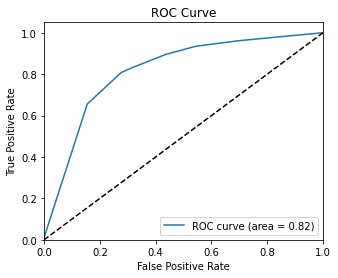

,prediction_DEP_DEL15,0.0,1.0
0,1.0,215618,685270
1,0.0,908263,262441


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/us_DT_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)

# confusion_matrix_pourcentage(DS_predictions)

In [0]:
# random_forest_classification_pipeline

parameters = list(RF_results[0])  # list((15, 32))
model_type = "random_forest_classification"
us_RF_model, us_RF_predictions, us_RF_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
us_RF_predictions.write.parquet(f"{blob_url}/test_on_eval_data/us_RF_prediction_12-04")

Begin fitting pipeline on train dataset to create random_forest_classification model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for random_forest_classification are: 
areaUnderROC: 0.8555080917905246, areaUnderPR: 0.8258671926873057


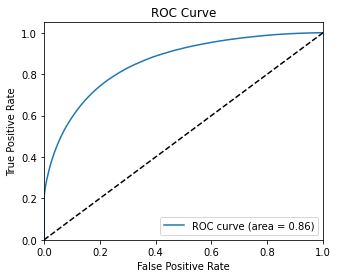

,prediction_DEP_DEL15,0.0,1.0
0,1.0,227288,703150
1,0.0,896593,244561


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/us_RF_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)

In [0]:
# GradientBoosted_classification_pipeline
parameters = list(GBC_results[0])  # list((15,32))
model_type = "GradientBoosted_classification"
us_GBC_model, us_GBC_predictions, us_GBC_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
# us_GBC_predictions.write.parquet(f'{blob_url}/test_on_eval_data/us_GBC_prediction_12-04')

Begin fitting pipeline on train dataset to create GradientBoosted_classification model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for GradientBoosted_classification are: 
areaUnderROC: 0.8554635899517583, areaUnderPR: 0.5774703699326095


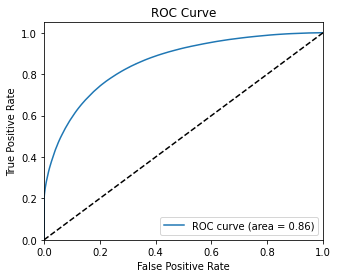

,prediction_DEP_DEL15,0.0,1.0
0,1.0,228449,704468
1,0.0,895432,243243


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/us_GBC_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)

In [0]:
# LogisticRegression_classification_pipeline
parameters = list(LR_results[0])
model_type = "logistic_regression"
us_LR_model, us_LR_predictions, us_LR_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
us_LR_predictions.write.parquet(f"{blob_url}/test_on_eval_data/us_LR_prediction_12-04")

Begin fitting pipeline on train dataset to create logistic_regression model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for logistic_regression are: 
areaUnderROC: 0.8207913951850149, areaUnderPR: 0.784525331939839


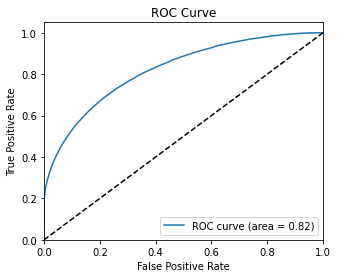

,prediction_DEP_DEL15,0.0,1.0
0,1.0,98148,417766
1,0.0,1025733,529945


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/us_LR_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)

In [0]:
# MLP
parameters = list(MLP_results[0])
model_type = "MLP"
us_MLP_model, us_MLP_predictions, us_MLP_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
us_MLP_predictions.write.parquet(
    f"{blob_url}/test_on_eval_data/us_MLP_prediction_12-04"
)

Begin fitting pipeline on train dataset to create MLP model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for MLP are: 
areaUnderROC: 0.7325880042980751, areaUnderPR: 0.3916346311286906


###Training on oversampled data

)

In [0]:
data = data_oversample

In [0]:
# Split the joined data frame into year chunks to allow concatenating them as blocks as shown visually in the image above.
# The custom-cross validator is expecting a dictionary where each key is a different fold, and the key value is a dataframe with a column called 'cv' that designates rows
# As either train or split

series_folds = {
    "fold1": (["2015", "2016"], ["2017", "2018"]),
    "fold2": (["2015", "2016", "2017"], ["2018", "2019"]),
    "fold3": (["2015", "2016", "2017", "2018"], ["2019", "2020"]),
}
cross_validation_data = {}
for fold in series_folds.keys():
    train_years = series_folds[fold][0]
    val_years = series_folds[fold][1]
    cross_validation_data[fold] = (
        data.filter(data.YEAR.isin(train_years + val_years))
        .withColumn(
            "cv", when(col("YEAR").isin(train_years), "train").otherwise("test")
        )
        .cache()
    )

####_Decision Tree Binary Classification

In [0]:
decision_tree_classifier_parameters = {"maxDepth": [5, 10, 15], "maxBins": [8, 16, 32]}

decision_tree_classifier_param_combos = parameter_combinations(
    decision_tree_classifier_parameters
)
DT_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "decision_tree_binary_classification",
    decision_tree_classifier_param_combos,
)
print(
    f"Decision Tree binary classification best params: {DT_results[0]}, areaUnderROC: {DT_results[1]}, areaUnderPR: {DT_results[2]}"
)

Running decision_tree_binary_classification
fold1: 0.7586217069374388
fold2: 0.755030038178966
fold3: 0.7504794692617037
highest_accuracy: 0.7547104047927028
Parmeters:{'maxDepth': 5, 'maxBins': 8}
fold1: 0.7116031490551422
fold2: 0.7082654380963374
fold3: 0.6883981566352081
fold1: 0.643384368294027
fold2: 0.6434077423660748
fold3: 0.6118174735873348
fold1: 0.5885258737609669
fold2: 0.5903569951237724
fold3: 0.6938590507362817
fold1: 0.5573700251410221
fold2: 0.6151557074910787
fold3: 0.6065547487903962
fold1: 0.5969769296553842
fold2: 0.5763506881724447
fold3: 0.6178742213376502
fold1: 0.6491808523681566
fold2: 0.63324255598171
fold3: 0.6355552460805735
fold1: 0.6487399733562145
fold2: 0.6493528948675306
fold3: 0.6371885278049695
fold1: 0.6162375026259536
fold2: 0.6131514657125573
fold3: 0.630890668701637
Decision Tree binary classification best params: (5, 8), areaUnderROC: 0.7547104047927028, areaUnderPR: 0.7491870273897551


####_RandomForest Binary Classification

In [0]:
decision_tree_classifier_parameters = {"maxDepth": [5, 10, 15], "maxBins": [8, 16, 32]}

decision_tree_classifier_param_combos = parameter_combinations(
    decision_tree_classifier_parameters
)
RF_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "random_forest_classification",
    decision_tree_classifier_param_combos,
)
print(
    f"Random Forest classification best params: {RF_results[0]}, areaUnderROC: {RF_results[1]}, areaUnderPR: {RF_results[2]}"
)

Running random_forest_classification
fold1: 0.8400161337880749
fold2: 0.8344083207841261
fold3: 0.847016956311614
highest_accuracy: 0.8404804702946049
Parmeters:{'maxDepth': 5, 'maxBins': 8}
fold1: 0.8425971254054547
fold2: 0.8383901723722634
fold3: 0.849974755992979
highest_accuracy: 0.8436540179235656
Parmeters:{'maxDepth': 5, 'maxBins': 16}
fold1: 0.8423791095989466
fold2: 0.8385660294003691
fold3: 0.8500551114297619
highest_accuracy: 0.8436667501430257
Parmeters:{'maxDepth': 5, 'maxBins': 32}
fold1: 0.8492885874872951
fold2: 0.8439649836245475
fold3: 0.8555176843491737
highest_accuracy: 0.8495904184870054
Parmeters:{'maxDepth': 10, 'maxBins': 8}
fold1: 0.852200531344239
fold2: 0.8473820024766568
fold3: 0.8586284422106946
highest_accuracy: 0.8527369920105302
Parmeters:{'maxDepth': 10, 'maxBins': 16}
fold1: 0.8528755933802783
fold2: 0.8483550369766646
fold3: 0.8589668191393105
highest_accuracy: 0.8533991498320844
Parmeters:{'maxDepth': 10, 'maxBins': 32}
fold1: 0.8524899023450552
fol

####_Gradient-Boosted Tree Binary Classification

In [0]:
decision_tree_classifier_parameters = {"maxDepth": [5, 10, 15], "maxBins": [8, 16, 32]}

decision_tree_classifier_param_combos = parameter_combinations(
    decision_tree_classifier_parameters
)
GBC_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "GradientBoosted_classification",
    decision_tree_classifier_param_combos,
)
print(
    f"Gradient Boosted classification best params: {GBC_results[0]}, areaUnderROC: {GBC_results[1]},areaUnderPR: {GBC_results[2]} "
)

Running GradientBoosted_classification
fold1: 0.8515877799915574
fold2: 0.8466233714340207
fold3: 0.857743997535474
highest_accuracy: 0.8519850496536839
Parmeters:{'maxDepth': 5, 'maxBins': 8}
fold1: 0.8540879910069774
fold2: 0.8495761137118889
fold3: 0.8609737033713699
highest_accuracy: 0.8548792693634121
Parmeters:{'maxDepth': 5, 'maxBins': 16}
fold1: 0.8545931893630138
fold2: 0.850030370485703
fold3: 0.861112223812636
highest_accuracy: 0.855245261220451
Parmeters:{'maxDepth': 5, 'maxBins': 32}
fold1: 0.8527679925463777
fold2: 0.8476538656207565
fold3: 0.8588374463978802
fold1: 0.8557489954813731
fold2: 0.8513258648092079
fold3: 0.8627257303680373
highest_accuracy: 0.8566001968862061
Parmeters:{'maxDepth': 10, 'maxBins': 16}
fold1: 0.8565300923907405
fold2: 0.8520129060499908
fold3: 0.8632882603008036
highest_accuracy: 0.8572770862471785
Parmeters:{'maxDepth': 10, 'maxBins': 32}
fold1: 0.8470251800339765
fold2: 0.8432625727696588
fold3: 0.8563150341833957
fold1: 0.8483445461552882
fo

####_Logistic Regression Binary Classification

In [0]:
logistic_regression_parameters = {
    "regParam": [0.3, 0.5, 0.8],
    "elasticNetParam": [0.3, 0.5, 0.8],
}

logistic_regression_param_combos = parameter_combinations(
    logistic_regression_parameters
)
LR_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data,
    feature_columns,
    "DEP_DEL15",
    "logistic_regression",
    logistic_regression_param_combos,
)
print(
    f"Logistic Regression best params: {LR_results[0]}, areaUnderROC: {LR_results[1]},areaUnderPR: {LR_results[2]} "
)

Running logistic_regression
fold1: 0.815245764558585
fold2: 0.8080507106585573
fold3: 0.8268767446191538
highest_accuracy: 0.8167244066120988
Parmeters:{'regParam': 0.3, 'elasticNetParam': 0.3}
fold1: 0.7839430425620546
fold2: 0.7781516401938509
fold3: 0.8026410695342848
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.783942610929869
fold2: 0.7781520497583981
fold3: 0.8026416149326773
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
fold1: 0.5
fold2: 0.5
fold3: 0.5
Logistic Regression best params: (0.3, 0.3), areaUnderROC: 0.8167244066120988,areaUnderPR: 0.7786362308719793 


####_Multilayer perceptron classifier

In [0]:
MLP_parameters = {"layers": [[19, 2], [19, 5, 2]], "blockSize": [128]}

MLP_param_combos = parameter_combinations(MLP_parameters)
MLP_results = TimeSeriesCrossValidatorClassifier(
    cross_validation_data, feature_columns, "DEP_DEL15", "MLP", MLP_param_combos
)
print(
    f"Logistic Regression best params: {MLP_results[0]}, areaUnderROC: {MLP_results[1]},areaUnderPR: {MLP_results[2]} "
)

Running MLP
fold1: 0.4202320567412364
fold2: 0.4188094631531023
fold3: 0.4214053716357257
highest_accuracy: 0.4201489638433548
Parmeters:{'layers': [19, 2], 'blockSize': 128}
fold1: 0.48031163691151296
fold2: 0.48571761380664713
fold3: 0.8143420419638376
highest_accuracy: 0.5934570975606659
Parmeters:{'layers': [19, 5, 2], 'blockSize': 128}
Logistic Regression best params: ([19, 5, 2], 128), areaUnderROC: 0.5934570975606659,areaUnderPR: 0.5596701150256682 


###Evaluation on test data

In [0]:
label_column = "DEP_DEL15"
train_data = data.filter((col("year")) < "2021")
test_data = data.filter((col("year")) == "2021")

In [0]:
# decision_tree_binary_classification

parameters = list(DT_results[0])  # list((15, 8))
model_type = "decision_tree_binary_classification"
os_DT_model, os_DT_predictions, os_DT_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
os_DT_predictions.write.parquet(f"{blob_url}/test_on_eval_data/os_DT_prediction_12-04")

Begin fitting pipeline on train dataset to create decision_tree_binary_classification model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for decision_tree_binary_classification are: 
areaUnderROC: 0.48952184485744377, areaUnderPR: 0.5857899885704394


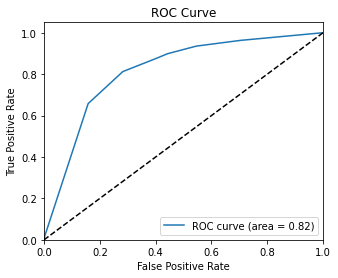

,prediction_DEP_DEL15,0.0,1.0
0,1.0,842010,2720640
1,0.0,3645546,1070204


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/os_DT_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)

In [0]:
# random_forest_classification_pipeline

parameters = list(RF_results[0])  # list((15, 32))
model_type = "random_forest_classification"
os_RF_model, os_RF_predictions, os_RF_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
os_RF_predictions.write.parquet(f"{blob_url}/test_on_eval_data/os_RF_prediction_12-04")

Begin fitting pipeline on train dataset to create random_forest_classification model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for random_forest_classification are: 
areaUnderROC: 0.8557089098126449, areaUnderPR: 0.8263009343463817


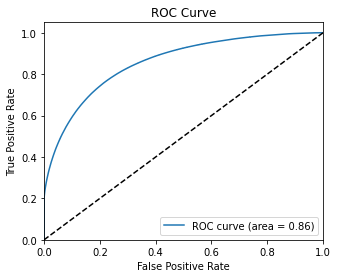

,prediction_DEP_DEL15,0.0,1.0
0,1.0,903133,2811252
1,0.0,3584423,979592


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/os_RF_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)

In [0]:
# GradientBoosted_classification_pipeline
parameters = list(GBC_results[0])  # list((15,32))
model_type = "GradientBoosted_classification"
os_GBC_model, os_GBC_predictions, os_GBC_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
os_GBC_predictions.write.parquet(
    f"{blob_url}/test_on_eval_data/os_GBC_prediction_12-04"
)

Begin fitting pipeline on train dataset to create GradientBoosted_classification model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for GradientBoosted_classification are: 
areaUnderROC: 0.855904551076863, areaUnderPR: 0.8267458487985712


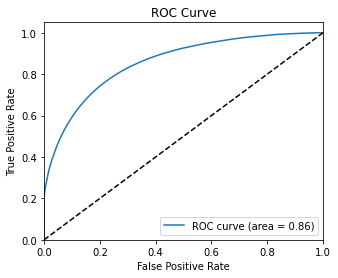

,prediction_DEP_DEL15,0.0,1.0
0,1.0,909820,2817008
1,0.0,3577736,973836


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/os_GBC_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)

In [0]:
# LogisticRegression_classification_pipeline
parameters = list(LR_results[0])
model_type = "logistic_regression"
os_LR_model, os_LR_predictions, os_LR_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
os_LR_predictions.write.parquet(f"{blob_url}/test_on_eval_data/os_LR_prediction_12-04")

Begin fitting pipeline on train dataset to create logistic_regression model
pipeline fit has been completed on the train data! Let's begin model transformation on the test data.
Model transformation on test data completed! Now begin evaluation.
Evaluation completed!
Evaluation results for logistic_regression are: 
areaUnderROC: 0.8209444931915482, areaUnderPR: 0.7851895941247415


In [0]:
# MLP
parameters = list(MLP_results[0])
model_type = "MLP_regression"
os_MLP_model, os_MLP_predictions, os_MLP_evaluator = evaluate_testSet(
    train_data, test_data, feature_columns, label_column, model_type, parameters
)
# os_MLP_predictions.write.parquet(f'{blob_url}/test_on_eval_data/os_MLP_prediction_12-04')

Begin fitting pipeline on train dataset to create MLP_regression model


---------------------------------------------------------------------------
UnboundLocalError                         Traceback (most recent call last)
<command-3715695163229206> in <cell line: 4>()
      2 parameters = list(MLP_results[0])
      3 model_type = 'MLP_regression'
----> 4 os_MLP_model, os_MLP_predictions, os_MLP_evaluator = evaluate_testSet(train_data, test_data, feature_columns, label_column, model_type, parameters)
      5 #os_MLP_predictions.write.parquet(f'{blob_url}/test_on_eval_data/os_MLP_prediction_12-04')

<command-3715695163229153> in evaluate_testSet(train_data, test_data, feature_columns, label_column, model_type, parameters)
     29         )
     30 
---> 31     model = pipeline.fit(train_data)
     32 
     33     print(

UnboundLocalError: local variable 'pipeline' referenced before assignment

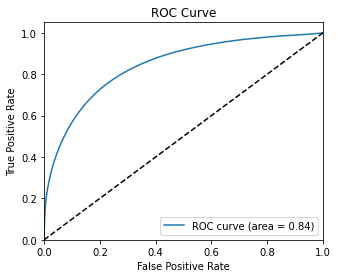

,prediction_DEP_DEL15,0.0,1.0
0,1.0,280730,408222
1,0.0,4206826,539489


In [0]:
DS_predictions = spark.read.parquet(
    f"{blob_url}/test_on_eval_data/os_MLP_prediction_12-04"
)
plotting_function(DS_predictions)
confusion_matrix(DS_predictions)